In [1]:
import skeliner as sk

In [2]:
seg_id = 720575940545220339
MESH_PATH = f"../data/{seg_id}.obj"
mesh = sk.io.load_mesh(MESH_PATH)

In [3]:
skel = sk.skeletonize(mesh, 
    detect_soma=True,
    # --- post-processing parameters (all are defaults) ---
    collapse_soma=True, 
    bridge_gaps=True, 
    prune_tiny_neurites=True, 
    # --- meta data ---
    unit="nm", # mesh unit
    id=seg_id,
    # --- Optional ---
    verbose=True,
)

[skeliner] starting skeletonisation (636,684 vertices, 1,274,227 faces)
 ↳  build surface graph                          … 12.86 s
 ↳  bin surface vertices by geodesic distance    … 10.78 s
 ↳  compute bin centroids and radii              … 22.69 s
 ↳  post-skeletonization soma detection          … 0.31 s
      └─ Found soma at [951560.0, 1086484.6, 34101.5]
      └─ (r = 10148.5, 5344.6, 2575.0)
 ↳  map mesh faces to skeleton edges             … 2.22 s
 ↳  merge redundant near-soma nodes              … 1.86 s
      └─ 129 nodes merged into soma
      └─ Moved soma to [951519.2, 1086418.2, 34093.4]
      └─ (r =  9589.7, 6004.5, 2608.4)
 ↳  bridge skeleton gaps                         … 0.61 s
 ↳  build global minimum-spanning tree           … 0.33 s
 ↳  prune tiny neurites                          … 3.11 s
      └─ Merged 8 peri-soma nodes into soma 
      └─ Moved soma to [951589.5, 1086350.8, 34190.9]
      └─ (r =  8795.8, 5831.4, 2727.5)
TOTAL (soma + core + post)                 

(<Figure size 600x600 with 3 Axes>,
 {'B': <Axes: label='B', ylabel='z (μm)'>,
  'A': <Axes: label='A', xlabel='x (μm)', ylabel='y (μm)'>,
  'C': <Axes: label='C', xlabel='z (μm)'>})

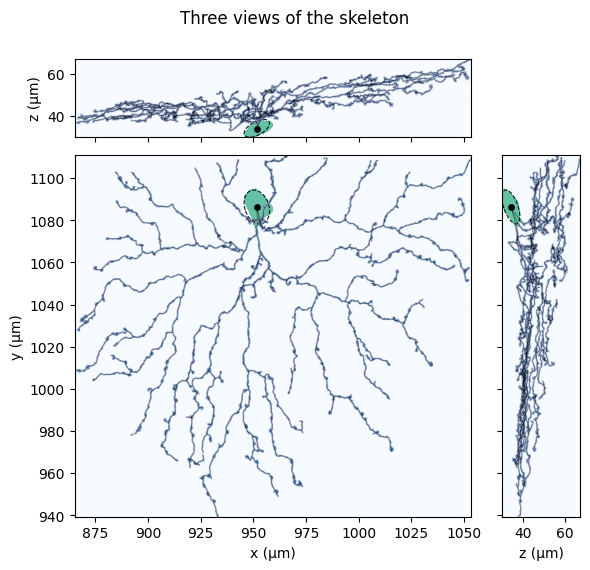

In [4]:
sk.plot3v(skel, mesh, 
           scale=1e-3, unit="μm",
           planes=["xy", "xz", "zy"], 
           color_by="ntype", skel_cmap="Set2",
           title="Three views of the skeleton",
           figsize=(6, 6))

In [5]:
# save the skeleton to SWC and NPZ

# This will save the skeleton as it is, without any conversion.
# skel.to_npz(f"{skel.meta['id']}.npz") # original unit: nm

# While for SWC, it's normally saved in microns (μm).
# skel.set_unit("μm") # this will only change the metadata, not the coordinates
# skel.to_swc(f"{skel.meta['id']}.swc", scale=1e-3) # saved in μm, the conversion is done within `.to_swc()`

# Or you can convert everything in the skeleton object first
# skel.convert_unit("μm") # the conversion is done in-place
# skel.to_npz(f"{skel.meta['id']}.npz") # saved in μm
# skel.to_swc(f"{skel.meta['id']}.swc") # saved in μm

In [6]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-11-13 15:48:15CET

Python implementation: CPython
Python version       : 3.13.9
IPython version      : 9.7.0

skeliner: 0.2.3

Watermark: 2.5.0

